In [2]:
from mylib import read_vectors
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BASE_DIR = "../simulations/results/"
# **.spawner.tl = exponential(10min)
# **.spawner.to = exponential(10min)
# **.spawner.tp = exponential(120min)
# **.spawner.tn = exponential(30min)
tl = 8
tn = 8
tp = 210
tn = 30
REP = range(1)

vectors = read_vectors(BASE_DIR + "Histogram-#{}.vec.csv", REP)
vectors.keys()

dict_keys(['numParked', 'landQueueLen', 'landQueueTime', 'toffQueueLen', 'toffQueueTime'])

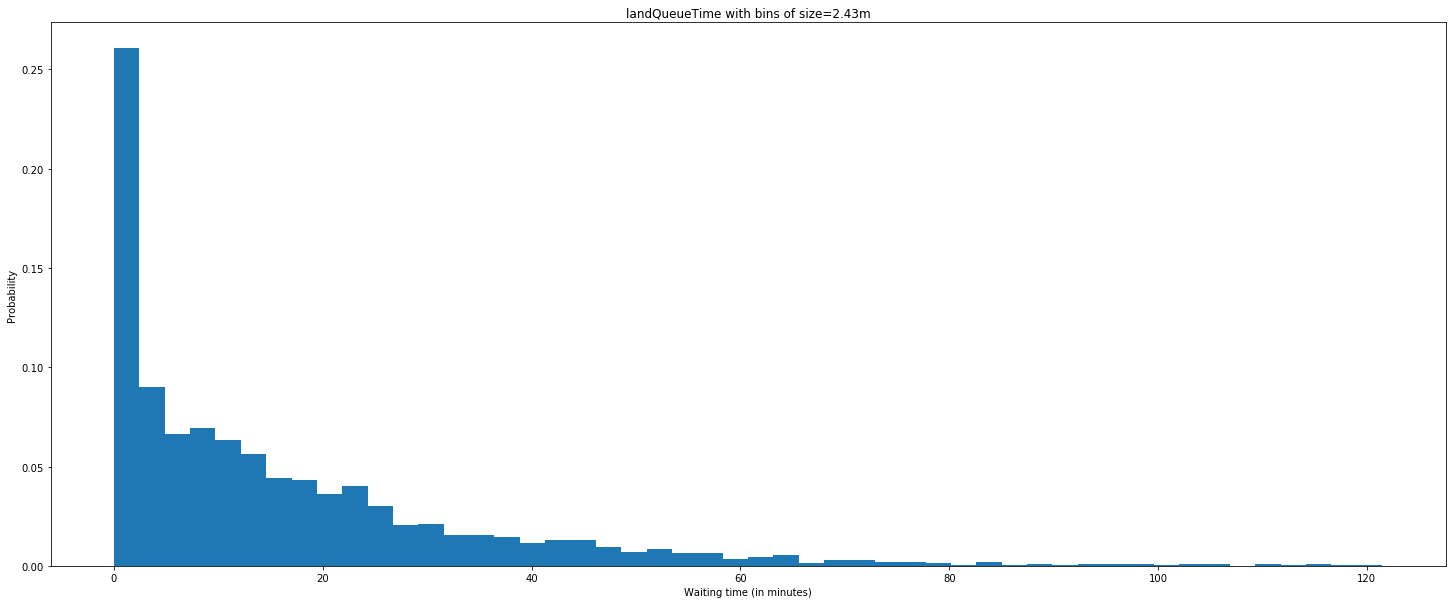

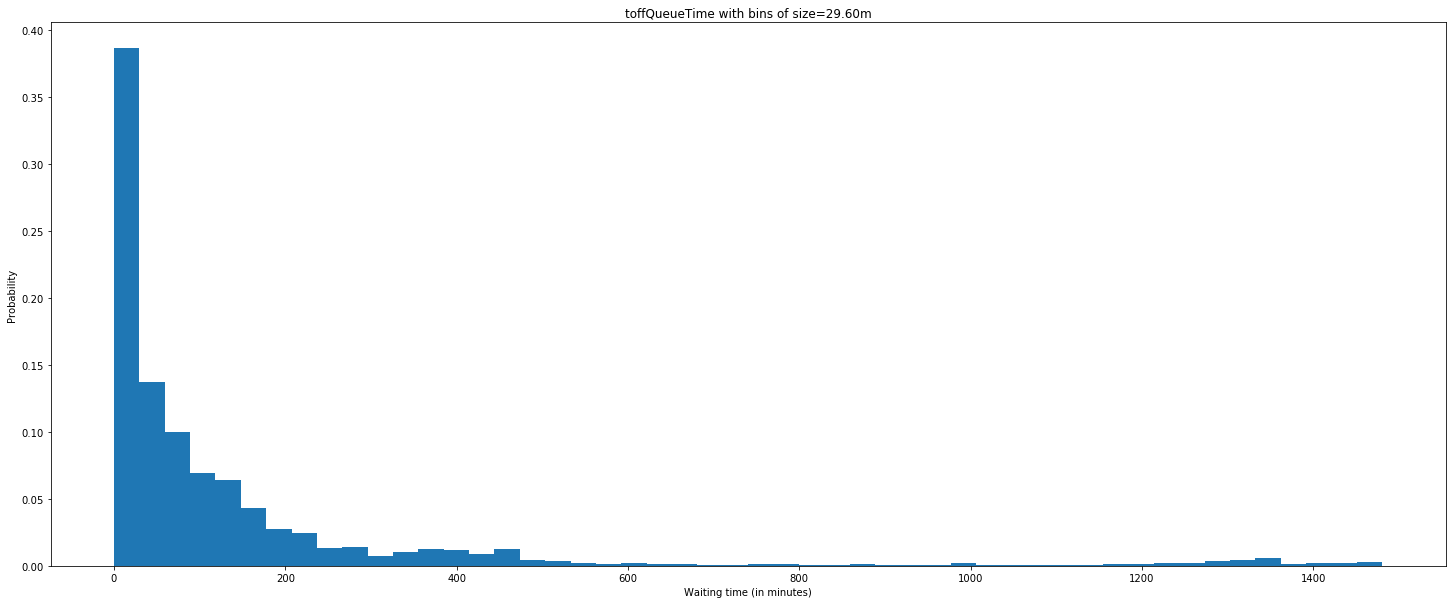

In [4]:
plt.rcParams["figure.figsize"] = (25, 10)
for name in ["landQueueTime", "toffQueueTime"]:
	v = vectors[name][0,].vecvalue
	counts, bins = np.histogram(v, bins=50)

	counts = counts / len(v) # normalize count
	bins = bins / 60 # minute as measure

	plt.hist(bins[:-1], bins, weights=counts)
	plt.title(f"{name} with bins of size={bins[1]-bins[0]:.2f}m")
	plt.ylabel("Probability")
	plt.xlabel("Waiting time (in minutes)")
	plt.show()


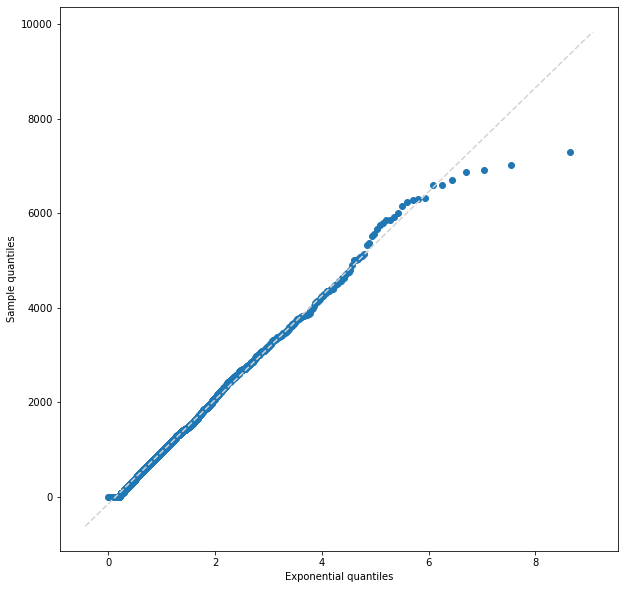

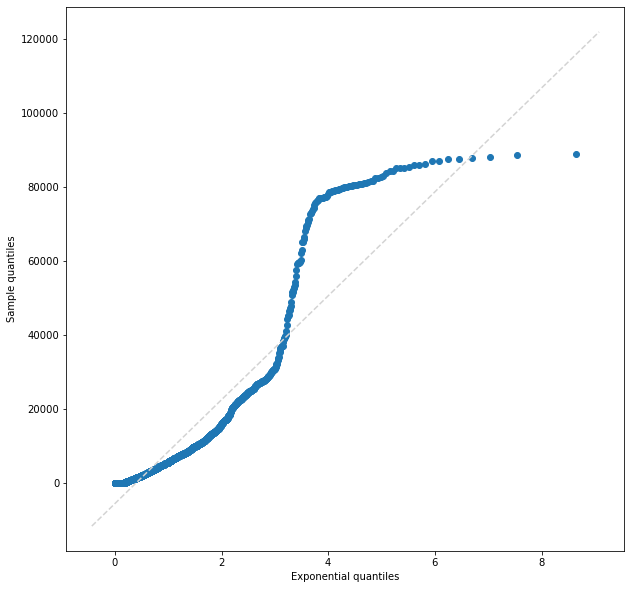

In [32]:
import scipy.stats as sp_st
import matplotlib.pyplot as plt

def qqplot(data, dist):
	n = len(data)
	xs = [dist((j+0.5)/n) for j in range(n)]
	ys = sorted(data)
	plt.plot(xs, ys, 'o')
	
	# show linear fit
	a, b, *_ = sp_st.linregress(xs, ys)
	x = np.linspace(*plt.xlim(), 100)
	plt.plot(x, a*x + b, "--", color="lightgrey")

plt.rcParams["figure.figsize"] = (10, 10)
qqplot(vectors["landQueueTime"][0,].vecvalue, sp_st.expon.ppf)
plt.ylabel("Sample quantiles")
plt.xlabel("Exponential quantiles")
plt.show()
qqplot(vectors["toffQueueTime"][0,].vecvalue, sp_st.expon.ppf)
plt.ylabel("Sample quantiles")
plt.xlabel("Exponential quantiles")
plt.show()